<a href="https://colab.research.google.com/github/Aniketh-GHub/Supervised-Learning-Projects/blob/main/German_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:

# Loading the data
data = pd.read_csv("/content/Top_12_German_Companies NEW.csv")

In [3]:
data.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


In [4]:
data.tail()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"
383,Merck KGaA,9/30/2024,15036344926,1.704098e+09,30603212259,59444780752,28841568494,2.866.690.036,5.908.477.575,1.061.080.026,"556,84%"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     384 non-null    object 
 1   Period                      384 non-null    object 
 2   Revenue                     384 non-null    int64  
 3   Net Income                  384 non-null    float64
 4   Liabilities                 384 non-null    int64  
 5   Assets                      384 non-null    int64  
 6   Equity                      384 non-null    int64  
 7   ROA (%)                     384 non-null    object 
 8   ROE (%)                     384 non-null    object 
 9   Debt to Equity              384 non-null    object 
 10  percentage  Debt to Equity  384 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 33.1+ KB


In [6]:
data.describe()

,Revenue,Net Income,Liabilities,Assets,Equity
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,1.270992e+10,1.249025e+09,3.115579e+10,6.141624e+10,3.026045e+10
std,4.095183e+09,5.445441e+08,1.139538e+10,1.698922e+10,1.172803e+10
min,5.149850e+09,2.980309e+08,1.004637e+10,2.177324e+10,1.001762e+10
25%,9.315161e+09,8.643813e+08,2.085174e+10,5.074013e+10,1.966813e+10
50%,1.266963e+10,1.145476e+09,3.230659e+10,6.020715e+10,2.999063e+10
75%,1.621724e+10,1.560234e+09,4.088942e+10,7.369075e+10,3.984646e+10
max,1.990964e+10,2.884007e+09,4.976940e+10,9.657402e+10,4.991812e+10


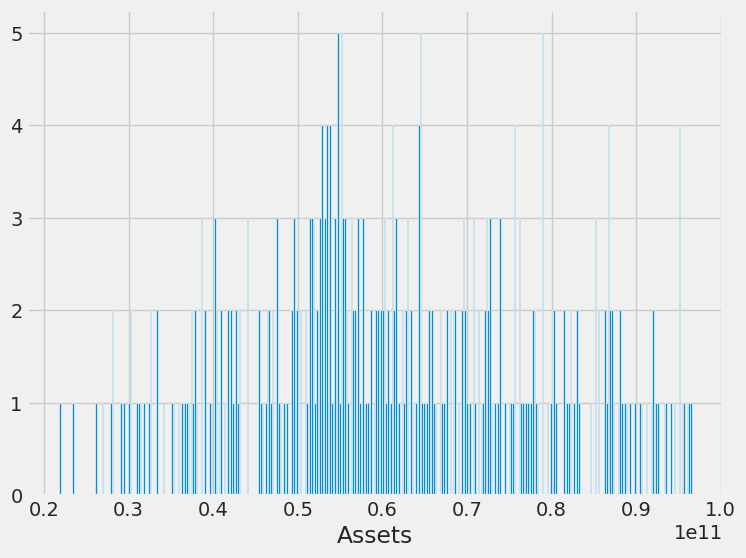

In [8]:
plt.figure(figsize=(8, 6))
data.Assets.hist(bins=data.Assets.nunique())
plt.xlabel('Assets')
plt.show()

<Figure size 800x600 with 0 Axes>

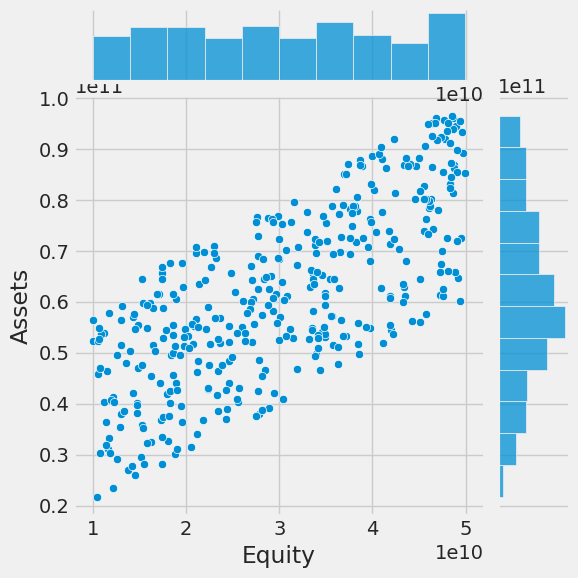

In [9]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Equity"], y=data.Assets)
plt.show()

<Figure size 800x600 with 0 Axes>

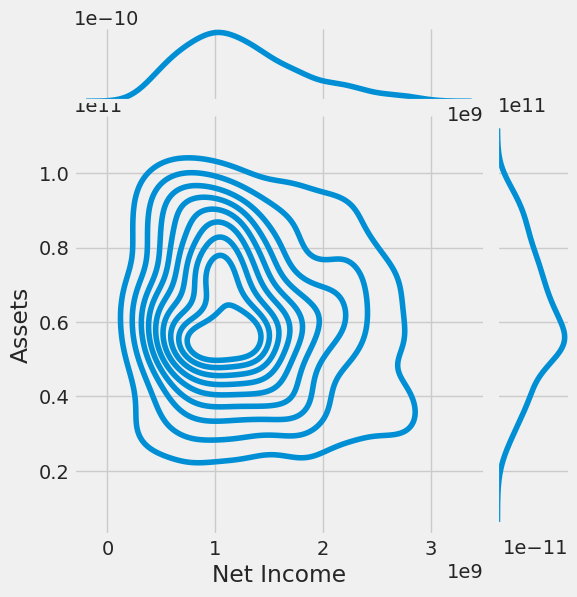

In [10]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Net Income"], y=data.Assets, kind='kde')
plt.show()

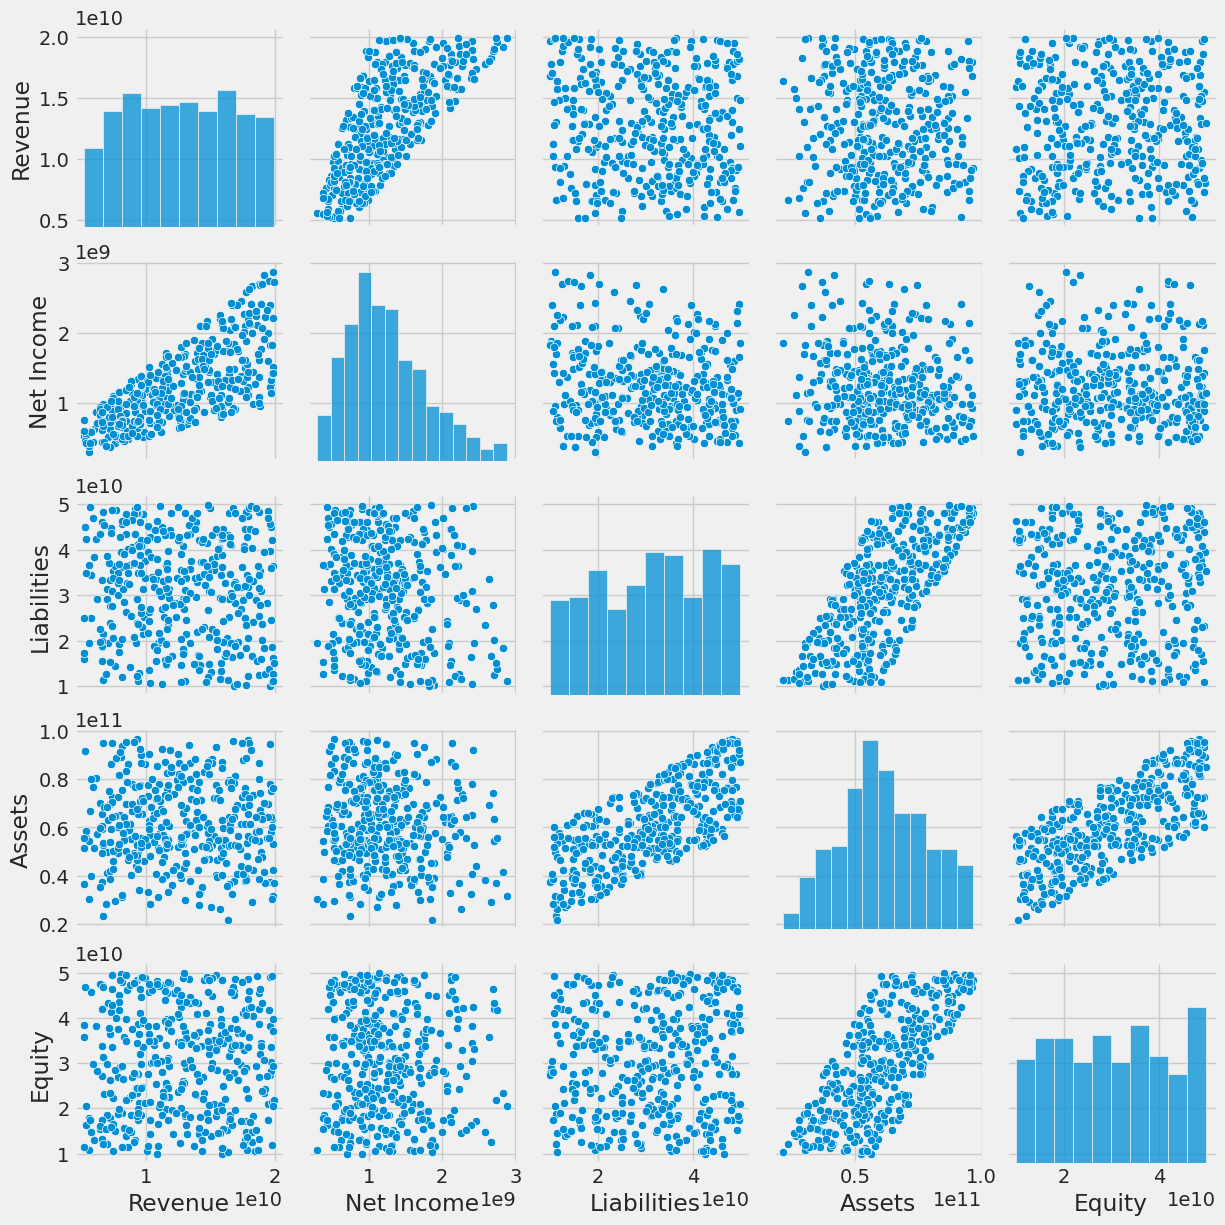

In [11]:
sns.pairplot(data)
plt.show()

In [12]:
data['Liabilities'].value_counts()

,count
Liabilities,
21354201295,1
45009303223,1
42066934650,1
47047722396,1
42824962792,1
...,...
47538352610,1
46117811894,1
38023980809,1


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = data.drop(columns=['Company', 'Period', 'ROA (%)', 'ROE (%)', 'Debt to Equity', 'percentage  Debt to Equity'])
y = data['Equity']
X = pd.get_dummies(X, drop_first=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=2000)  # Increase iterations for convergence
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
